In [1]:
from samana.Data.j0803 import J0803_MIRI
from samana.Model.j0803_model import J0803ModelEPLM3M4Shear
import numpy as np
import matplotlib.pyplot as plt
from lenstronomy.Workflow.fitting_sequence import FittingSequence
import h5py

In [2]:
data = J0803_MIRI()
data.mask_quasar_image_for_reconstruction(True)
model = J0803ModelEPLM3M4Shear(data, shapelets_order=2)
kwargs_lens_macro_init = None

kwargs_model, _, _, _, _ = model.setup_kwargs_model(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_params = model.kwargs_params(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_likelihood = model.kwargs_likelihood

kwargs_likelihood['flux_ratio_likelihood'] = False
kwargs_likelihood['kwargs_flux_compute'] = {'source_type': 'INF'} 
#kwargs_likelihood['prior_lens'] = [[0,'a1_a', 0.0, 0.01], [0,'a3_a', 0.0, 0.01], [0,'a4_a', 0.0, 0.01]]
kwargs_data_joint = data.kwargs_data_joint
kwargs_data_joint['flux_ratios'] = np.array([0.82, 0.25, 0.56])
kwargs_data_joint['flux_ratio_errors'] = np.array([0.02, 0.01, 0.01])

fitting_sequence = FittingSequence(data.kwargs_data_joint, kwargs_model, model.kwargs_constraints, 
                                  kwargs_likelihood, kwargs_params)

nthreads = 8
psf_symmetry = 1
fitting_kwargs_list = [
        ['update_settings', {'lens_add_fixed': [[0, ['a4_a', 'a3_a','a1_a'], [0.0, 0.0, 0.0]]]}],
        #['update_settings', {'source_add_fixed': [[1, ['n_max'], [0]]]}],
        ['PSO', {'sigma_scale': 1., 'n_particles': 20, 'n_iterations': 100, 'threadCount': nthreads}],
        #['update_settings', {'source_add_fixed': [[1, ['n_max'], [8]]]}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 20, 'n_iterations': 100, 'threadCount': nthreads}],
        #['MCMC', {'n_burn': 50, 'n_run': 25, 'walkerRatio': 4, 'sigma_scale': 0.1, 'threadCount': nthreads}]
                          ]
chain_list = fitting_sequence.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_sequence.best_fit()

/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


Computing the PSO ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.73it/s]

Max iteration reached! Stopping.
-1.5855593908674104 reduced X^2 of best position
-246.5544852798823 log likelihood
311 effective number of data points
[{'theta_E': 0.5750613780532355, 'gamma': 2.2689234579276927, 'e1': -0.2077757372084681, 'e2': -0.09058557226197478, 'center_x': -0.08060640118208351, 'center_y': -0.030942653070319348, 'a1_a': 0.0, 'delta_phi_m1': 0.1007631119606898, 'a3_a': 0.0, 'delta_phi_m3': -0.1022178059835847, 'a4_a': 0.0, 'delta_phi_m4': 2.4359644928867197}, {'gamma1': -0.22383725365787446, 'gamma2': -0.07884255360651808, 'ra_0': 0.0, 'dec_0': 0.0}] lens result
[{'amp': 1, 'R_sersic': 0.2580225257888151, 'n_sersic': 3.581409314608115, 'e1': 0.2382634718196171, 'e2': 0.1668922284282693, 'center_x': -0.03799590952374545, 'center_y': 0.0024266502968630873}, {'amp': 1, 'n_max': 2, 'beta': 0.11923460543844261, 'center_x': -0.03799590952374545, 'center_y': 0.0024266502968630873}] source result
[{'amp': 1, 'R_sersic': 2.1236374007354795, 'n_sersic': 9.317372610389507, 


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:68: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)


-1.395729335391478 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.3957293353914777
(23, ['gamma_lens0', 'delta_phi_m1_lens0', 'delta_phi_m3_lens0', 'delta_phi_m4_lens0', 'gamma1_lens1', 'gamma2_lens1', 'R_sersic_source_light0', 'n_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'beta_source_light1', 'R_sersic_lens_light0', 'n_sersic_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_y_image', 'delta_y_image', 'delta_y_image', 'delta_y_image'])


custom added logL = -0.5956343051969887
Prior likelihood = 0
image logL = -242.15903969042174
Astrometric likelihood = -3.7998112842638694
source position likelihood -2.5759903255640673e-25
1.4210633157341936




/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:225: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:1121: RuntimeWarning: invalid value encountered in log10
  np.log10(model),


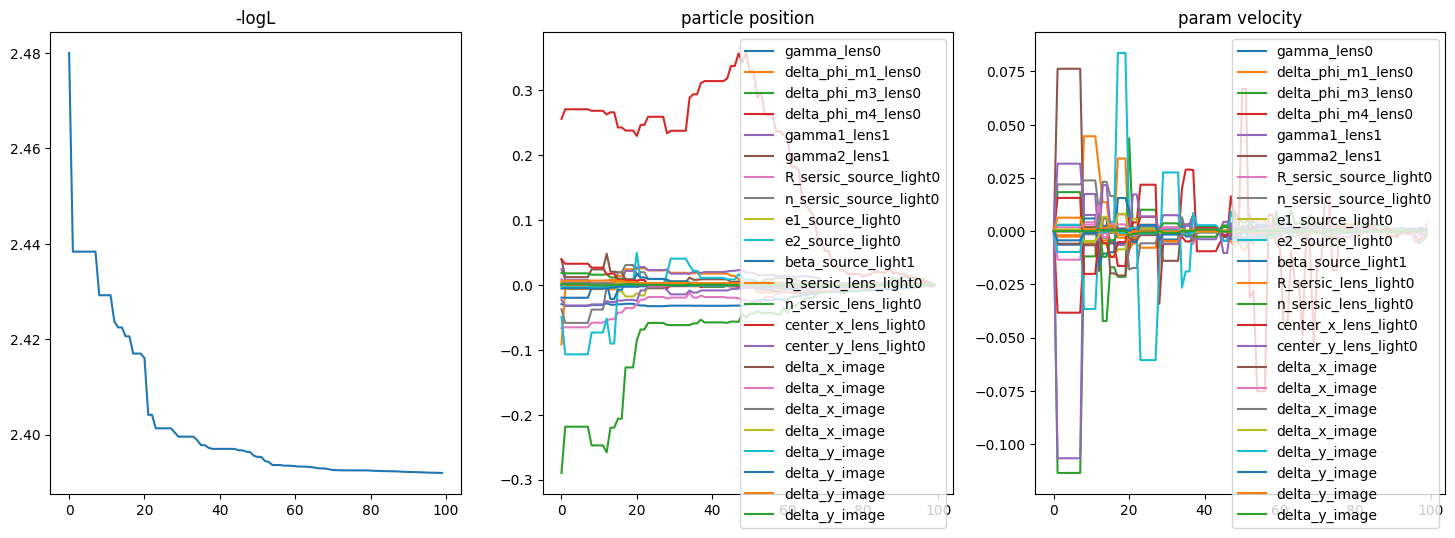

<Figure size 640x480 with 0 Axes>

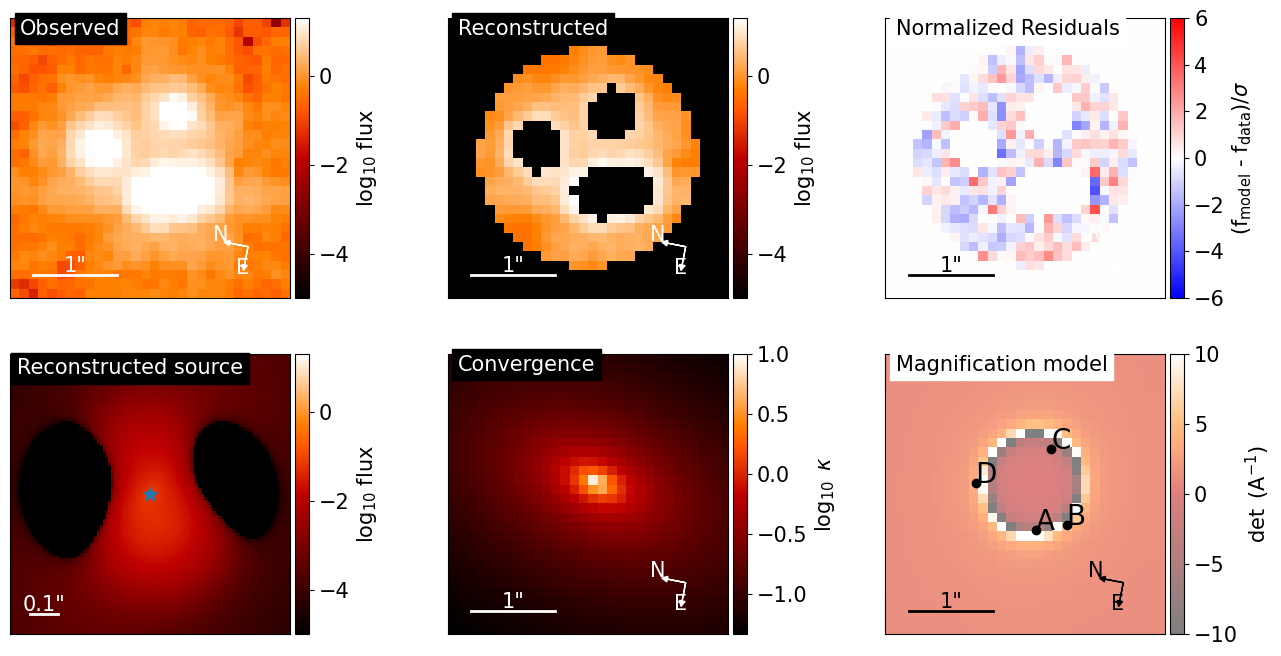

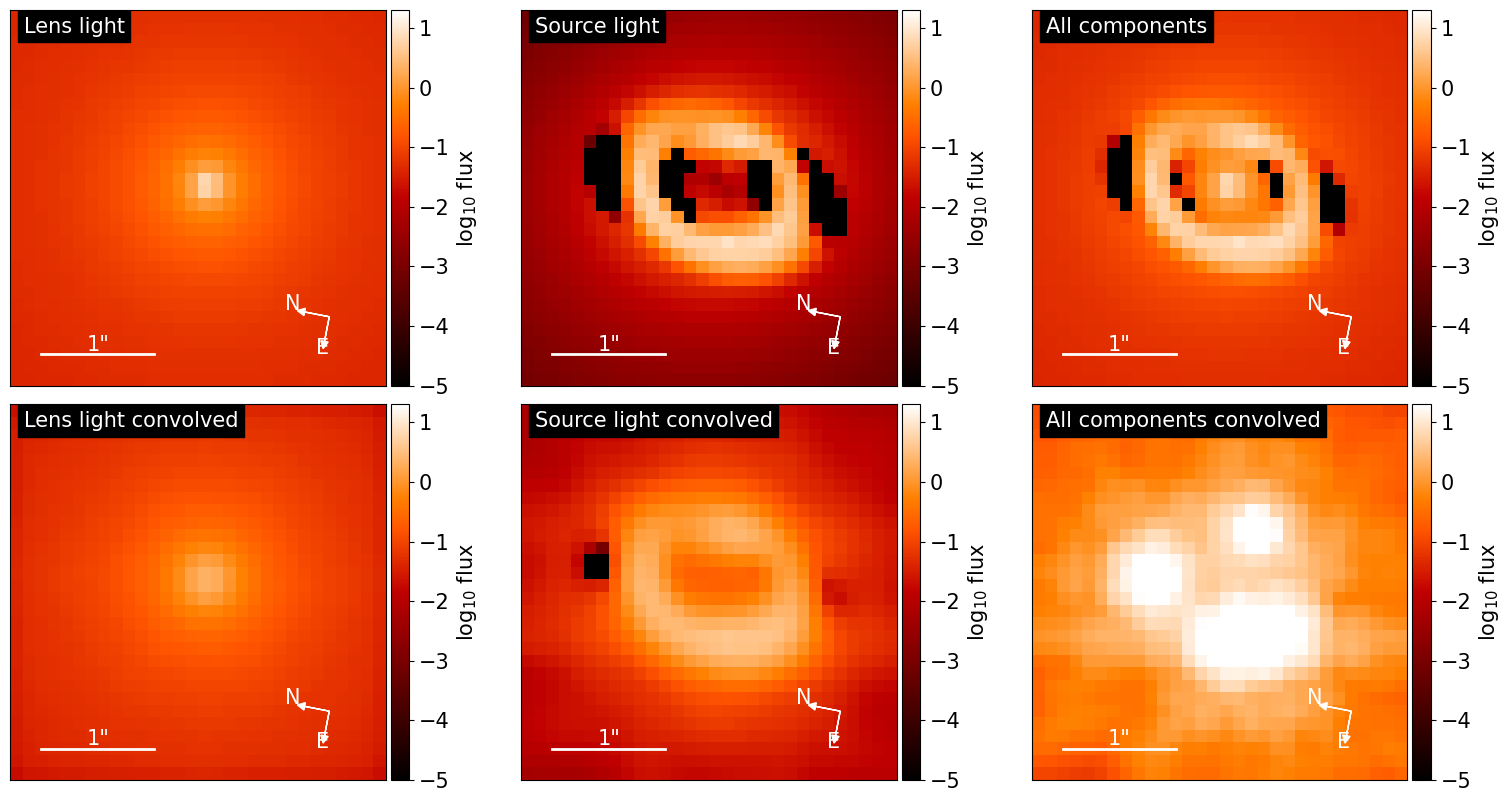

[{'theta_E': 0.5750613780532355, 'gamma': 2.2689234579276927, 'e1': -0.2077757372084681, 'e2': -0.09058557226197478, 'center_x': -0.08060640118208351, 'center_y': -0.030942653070319348, 'a1_a': 0.0, 'delta_phi_m1': 0.1007631119606898, 'a3_a': 0.0, 'delta_phi_m3': -0.1022178059835847, 'a4_a': 0.0, 'delta_phi_m4': 2.4359644928867197}, {'gamma1': -0.22383725365787446, 'gamma2': -0.07884255360651808, 'ra_0': 0.0, 'dec_0': 0.0}]
[{'amp': 9.579035684785952, 'R_sersic': 0.2580225257888151, 'n_sersic': 3.581409314608115, 'e1': 0.2382634718196171, 'e2': 0.1668922284282693, 'center_x': -0.03799590952374545, 'center_y': 0.0024266502968630873}, {'amp': array([ 548.17953405,  224.40409738, -148.74503769,  121.71987609,
       -196.6907502 , -227.23002134]), 'n_max': 2, 'beta': 0.11923460543844261, 'center_x': -0.03799590952374545, 'center_y': 0.0024266502968630873}]
[{'amp': 1.1958545694851377, 'R_sersic': 2.1236374007354795, 'n_sersic': 9.317372610389507, 'center_x': -0.0622069265718445, 'center_y

In [3]:
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
import matplotlib.pyplot as plt

multi_band_list = data.kwargs_data_joint['multi_band_list']
modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="gist_heat",
                      image_likelihood_mask_list=[data.likelihood_mask],fast_caustic=True)

param_class = fitting_sequence.param_class
print(param_class.num_param())
#print(chain_list)

for i in range(len(chain_list)):
    chain_plot.plot_chain_list(chain_list, i)

print('\n')
logL = fitting_sequence.best_fit_likelihood(verbose=True)
print(-2 * logL / fitting_sequence.likelihoodModule.num_data)
print('\n')

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.data_plot(ax=axes[0,0])
modelPlot.model_plot(ax=axes[0,1])
modelPlot.normalized_residual_plot(ax=axes[0,2], v_min=-6, v_max=6)
modelPlot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, numPix=100)
modelPlot.convergence_plot(ax=axes[1, 1], v_max=1)
modelPlot.magnification_plot(ax=axes[1, 2])
#f.tight_layout()
#f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
#plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.decomposition_plot(ax=axes[0,0], text='Lens light', lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,0], text='Lens light convolved', lens_light_add=True)
modelPlot.decomposition_plot(ax=axes[0,1], text='Source light', source_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,1], text='Source light convolved', source_add=True)
modelPlot.decomposition_plot(ax=axes[0,2], text='All components', source_add=True, lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,2], text='All components convolved', source_add=True, lens_light_add=True, point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()

#print(kwargs_result)
print(kwargs_result['kwargs_lens'])
print(kwargs_result['kwargs_source'])
print(kwargs_result['kwargs_lens_light'])

from lenstronomy.LensModel.lens_model import LensModel
lens_model = LensModel(kwargs_model['lens_model_list'], 
                      lens_redshift_list=kwargs_model['lens_redshift_list'], 
                      multi_plane=kwargs_model['multi_plane'], 
                      z_source=kwargs_model['z_source'])

ximg, yimg = data.x_image, data.y_image
m = np.absolute(lens_model.magnification(ximg, yimg, kwargs_result['kwargs_lens']))
print('best fit flux ratios: ', m[1:]/m[0])
print('measured flux ratios: ', 0.82, 0.25, 0.56)

0.1931471805599453
-1.395729335391478 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.3957293353914777


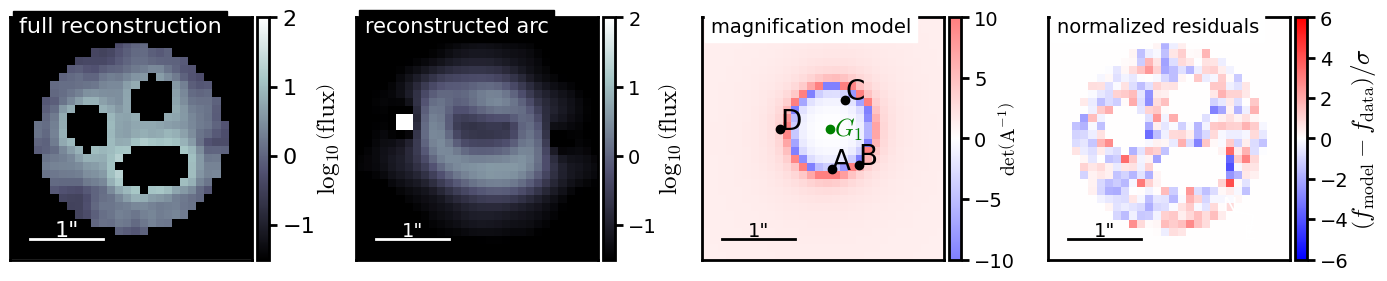

In [4]:
plt.rcParams['axes.linewidth'] = 2.
plt.rcParams['xtick.major.width'] = 2.
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.minor.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.width'] = 1.0
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'cm'
print((np.log(2) -0.5))

modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="bone",
                      image_likelihood_mask_list=[data.likelihood_mask],fast_caustic=True)

fig = plt.figure(1)
fig.set_size_inches(14,4.5)

ax1 = plt.subplot(141)
modelPlot._arrow_size = 0
v_min = -1.5
v_max = v_min + 3.5
modelPlot.model_plot(ax=ax1,
                    v_min=v_min,v_max=v_max,text='full reconstruction',font_size=16,no_arrow=True)
im = ax1.images
cb = im[-1].colorbar 
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)


ax2 = plt.subplot(142)
modelPlot._arrow_size = 0
modelPlot.decomposition_plot(ax=ax2, text='reconstructed arc', unconvolved=False, 
                             source_add=True, v_min=v_min, v_max=v_max,cmap='bone',
                             font_size=14,no_arrow=True)
im = ax2.images
cb = im[-1].colorbar 
#cb.set_ticklabels(ticks,fontsize=16)
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)

ax3 = plt.subplot(143)
modelPlot._arrow_size = 0
v_min = -3
v_max = v_min + 3.
modelPlot.magnification_plot(ax=ax3, cmap='bwr', text='magnification model', font_size=14,
                            no_arrow=True)
im = ax3.images
cb = im[-1].colorbar 
cb.set_label(r'$\rm{det}\left(A^{-1}\right)$',labelpad=-12)

satx = kwargs_result['kwargs_lens'][0]['center_x']
saty = kwargs_result['kwargs_lens'][0]['center_y']
xplot, yplot = data.coordinate_system.map_coord2pix(satx, saty)
pixel_width = data.coordinate_system.pixel_width
origin = [0,0]
x_ = xplot * pixel_width + origin[0]
y_ = yplot * pixel_width + origin[1]
ax3.plot(x_, y_, ".", color='g',markersize=12,alpha=1.)
ax3.text(x_+0.05, y_-0.1, r'$G_1$', fontsize=18, color='g')

# satx = kwargs_result['kwargs_lens'][2]['center_x']
# saty = kwargs_result['kwargs_lens'][2]['center_y']
# xplot, yplot = data.coordinate_system.map_coord2pix(satx, saty)
# pixel_width = data.coordinate_system.pixel_width
# origin = [0,0]
# x_ = xplot * pixel_width + origin[0]
# y_ = yplot * pixel_width + origin[1]
# ax3.plot(x_, y_, ".", color='g',markersize=12,alpha=1.)
# ax3.text(x_-0.2, y_-1., r'$G_2$', fontsize=18, color='g')


ax4 = plt.subplot(144)
modelPlot._arrow_size = 0
v_min = -3
v_max = v_min + 3.
modelPlot.normalized_residual_plot(ax=ax4,
                    cmap='bwr',font_size=14, text='normalized residuals')
im = ax4.images
cb = im[-1].colorbar 
cb.set_label(r'$\left(f_{\rm{model}}-f_{\rm{data}}\right)/\sigma$',labelpad=0,fontsize=18)

plt.subplots_adjust(wspace=-0.43, hspace=0.1)
plt.tight_layout()

#plt.savefig('../bmodel_figures/0803bmodel.pdf',bbox_inches='tight')

median:  -98.06053016691197
standard dev:  28.123839577791184


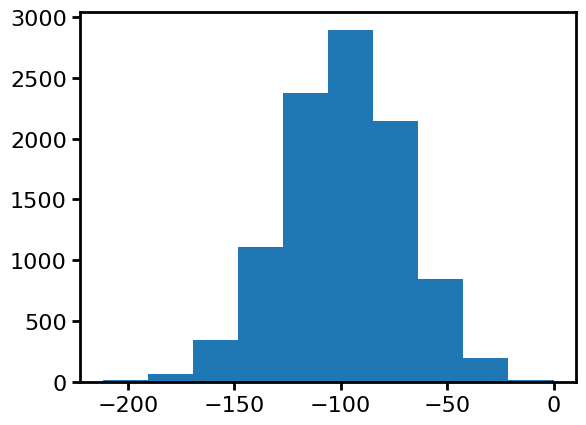

In [5]:
from lenstronomy.Util.class_creator import create_image_model 
import lenstronomy.Util.image_util as image_util

kwargs_data = data.kwargs_data
kwargs_psf = data.kwargs_psf
kwargs_numerics = data.kwargs_numerics 
image_model = create_image_model(kwargs_data, kwargs_psf, kwargs_numerics, kwargs_model)
likelihood_mask = data.likelihood_mask_imaging_weights
image_sim_no_noise = image_model.image(kwargs_result['kwargs_lens'], 
                              kwargs_result['kwargs_source'], 
                              kwargs_result['kwargs_lens_light'], 
                              kwargs_result['kwargs_ps'])
logL_list = []
model_error = image_model._error_map_model(
            kwargs_result['kwargs_lens'], kwargs_ps=kwargs_result['kwargs_ps'], kwargs_special=kwargs_result['kwargs_special']
        )


for i in range(0, 10000):
    poisson_noise = image_util.add_poisson(image_sim_no_noise, exp_time=58)
    poisson_noise = 0
    bkg = image_util.add_background(image_sim_no_noise, sigma_bkd=0.18)
    noise_map = bkg + poisson_noise
    #plt.imshow(noise_map);plt.show();a=input('cont')
    image_sim = image_sim_no_noise + noise_map
    logL = image_model.Data.log_likelihood(image_sim_no_noise + noise_map, likelihood_mask, model_error)
    #print(logL)
    logL_list.append(logL)
    
max_logL = np.max(logL_list)
logL_list = np.array(logL_list) - max_logL
_ = plt.hist(logL_list)
print('median: ', np.median(logL_list))
print('standard dev: ', np.std(logL_list))